# Quantify Clutter as a Regressor against Behavioral Data

Global clutter is defined here as the number of objects segmented in the image.

Local clutter is the number of objects segmented in a set radius around the target.

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load VE Behavioral Data

In [2]:

dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# dpath = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/'


# stim 
with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)
    
# std 
with open(dpath + 'z_std_125.npy' , 'rb') as f:
    std_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_std_250.npy' , 'rb') as f:
    std_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_std_1000.npy' , 'rb') as f:
    std_1000 = np.load(f, allow_pickle=True)

# x data
with open(dpath + 'X_125.npy' , 'rb') as f:
    X_125 = np.load(f, allow_pickle=True)
with open(dpath + 'X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)
with open(dpath + 'X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'z_final_y_125.npy' , 'rb') as f:
    y_125 = np.load(f, allow_pickle=True)
with open(dpath + 'z_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'z_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)
    
# residuals
with open(dpath + 'residuals/'+ 'z_residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
with open(dpath + 'residuals/'+ 'z_residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals/'+ 'z_residuals_1000.npy' , 'rb') as f:
    residuals_1000= np.load(f, allow_pickle=True)
    


## Load Discrimination Derived TD (target depth) data

In [3]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/data/finalDiscrimMatched/kinectCoded_discrimination/discrimination_derived_TD/'


with open(dpath + 'stim.npy' , 'rb') as f:
    derivedTD_stim = np.load(f, allow_pickle=True)
derivedTD_stim = [elem.split('/')[1][:-2] for elem in derivedTD_stim]

    
with open(dpath + 'derivedTD_125.npy' , 'rb') as f:
    _derivedTD_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedTD_250.npy' , 'rb') as f:
    _derivedTD_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedTD_1000.npy' , 'rb') as f:
    _derivedTD_1000 = np.load(f, allow_pickle=True) 
    
with open(dpath + 'residuals_derivedTD_125.npy' , 'rb') as f:
    _residuals_derivedTD_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedTD_250.npy' , 'rb') as f:
    _residuals_derivedTD_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedTD_1000.npy' , 'rb') as f:
    _residuals_derivedTD_1000 = np.load(f, allow_pickle=True) 
    

## Load Discrimination Derived VE  Data

In [9]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/data/finalDiscrimMatched/discrimination_derived_VE/'

with open(dpath + 'stimuli_125.npy' , 'rb') as f:
    derivedVE_stim_125 = np.load(f, allow_pickle=True)
derivedVE_stim_125 = [elem.split('/')[1][:-2] for elem in derivedVE_stim_125]

with open(dpath + 'stimuli_250.npy' , 'rb') as f:
    derivedVE_stim_250 = np.load(f, allow_pickle=True)
derivedVE_stim_250 = [elem.split('/')[1][:-2] for elem in derivedVE_stim_250]

with open(dpath + 'stimuli_1000.npy' , 'rb') as f:
    derivedVE_stim_1000 = np.load(f, allow_pickle=True)
derivedVE_stim_1000 = [elem.split('/')[1][:-2] for elem in derivedVE_stim_1000]

    
with open(dpath + 'derivedVE_125.npy' , 'rb') as f:
    _derivedVE_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedVE_250.npy' , 'rb') as f:
    _derivedVE_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedVE_1000.npy' , 'rb') as f:
    _derivedVE_1000 = np.load(f, allow_pickle=True) 
    
with open(dpath + 'residuals_derivedVE_125.npy' , 'rb') as f:
    _residuals_derivedVE_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedVE_250.npy' , 'rb') as f:
    _residuals_derivedVE_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedVE_1000.npy' , 'rb') as f:
    _residuals_derivedVE_1000 = np.load(f, allow_pickle=True) 
    

## Data arrays must be in the same stimulus order as the VE behavioral data

In [10]:
derivedVE_dict_125 = {}
derivedVE_dict_250 = {}
derivedVE_dict_1000 = {}

for i in range(len(derivedVE_stim_125)):
    derivedVE_dict_125[derivedVE_stim_125[i]] = [_derivedVE_125[i], _residuals_derivedVE_125[i]]
    
for i in range(len(derivedVE_stim_250)):
    derivedVE_dict_250[derivedVE_stim_250[i]] = [_derivedVE_250[i], _residuals_derivedVE_250[i]]
    
for i in range(len(derivedVE_stim_1000)):
    derivedVE_dict_1000[derivedVE_stim_1000[i]] = [_derivedVE_1000[i], _residuals_derivedVE_1000[i]]

In [11]:
stimfolder_125 = [elem.split('/')[1][:-2] for elem in stim_125]
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]
stimfolder_250[0]

'002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize'

In [13]:
# derivedVE_125 = []
# derivedVE_250 = []
# derivedVE_1000 = []

# residuals_derivedVE_125 = []
# residuals_derivedVE_250 = []
# residuals_derivedVE_1000 = []

# for stim in stimfolder_125:
#     data = derived_data_dict[stim]
#     derivedVE_125.append(data[0])
#     derivedVE_250.append(data[1])
#     derivedVE_1000.append(data[2])
    
#     residuals_derivedVE_125.append(data[3])
#     residuals_derivedVE_250.append(data[4])
#     residuals_derivedVE_1000.append(data[5])


In [14]:
derivedTD_dict_125 = {}
derivedTD_dict_250 = {}
derivedTD_dict_1000 = {}

for i in range(len(derivedTD_stim)):
    derivedTD_dict_125[derivedTD_stim[i]] = [_derivedTD_125[i], _residuals_derivedTD_125[i]]
    
for i in range(len(derivedTD_stim)):
    derivedTD_dict_250[derivedTD_stim[i]] = [_derivedTD_250[i], _residuals_derivedTD_250[i]]
    
for i in range(len(derivedTD_stim)):
    derivedTD_dict_1000[derivedTD_stim[i]] = [_derivedTD_1000[i], _residuals_derivedTD_1000[i]]

In [15]:
# derivedTD_125 = []
# derivedTD_250 = []
# derivedTD_1000 = []

# residuals_derivedTD_125 = []
# residuals_derivedTD_250 = []
# residuals_derivedTD_1000 = []

# for stim in derivedTD_stim:
#     data = derived_data_dict[stim]
#     derivedVE_125.append(data[0])
#     derivedVE_250.append(data[1])
#     derivedVE_1000.append(data[2])
    
#     residuals_derivedVE_125.append(data[3])
#     residuals_derivedVE_250.append(data[4])
#     residuals_derivedVE_1000.append(data[5])


In [18]:
stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

objSA_data = {}

for stim in os.listdir(stimuli_path):
    if 'resize' in stim:
        p = stimuli_path + '/' + stim + '/data.json'
        data = json.load(open(p))
        target_object = data['objects'][0]['name']
        dbID = data['objects'][0]['dbID']
        kp = kinect192_path + '/' + stim[:-2] + '/annotation2Dfinal'
        for file in os.listdir(kp):
            if 'objSA' in file:
                objSA = json.load(open(kp + '/' + file))
                objSA_data[stim[:-2]] = objSA


In [19]:
objSA_data['000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize']

{'floor_3': 3.689464597292053,
 'bench_2': 1.6132601681688803,
 'wall_4': 4.73195337315781,
 'bench2_9': 5.5677571310778005,
 'table_10': 5.180670126559448,
 'wall2_11': 3.630879463416829}

## Global Clutter x Behavioral Data

global clutter = number of labeled objects 

In [20]:
# Opening JSON file
f = open('cleaned_globalClutter.json')
  
# returns JSON object as 
# a dictionary
cleaned_globalClutter = json.load(f)

In [45]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [80]:
globalClutter_dict = {}
for stim in objSA_data:
    count = 0
    incl_obj = []
    for key in objSA_data[stim]:
#         sans_num_key = ''.join([i for i in key if not i.isdigit()])
        if 'floor' in key: 
            count += 0
#             print(key, 'floor')
        elif 'wall' in key: count += 0
        else: 
            count += 1
            incl_obj.append(key)
#             print(key, 'wall')
            
            
        globalClutter_dict[stim] = [count, incl_obj]
    

In [65]:
# globalClutter_dict['000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize'], objSA_data['000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize']

In [21]:
# from IPython.display import Image 

# _dir = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data/'
# globalClutter_dict_keys = list(globalClutter_dict.keys())
# i = 139

# for file in os.listdir(_dir + globalClutter_dict_keys[i] + '/image'):
#     if '.ipynb_checkpoints' not in file:
#         p = _dir + globalClutter_dict_keys[i] + '/image/' + file

# pil_img = Image(filename=p)
# display(pil_img)
# print(globalClutter_dict_keys[i])
# print(globalClutter_dict[globalClutter_dict_keys[i]])

In [ ]:
# cleaned_globalClutter = {key: None for key in globalClutter_dict_keys}


In [376]:

# cleaned_globalClutter[globalClutter_dict_keys[i]] = 8

# cleaned_globalClutter

In [377]:
with open("cleaned_globalClutter.json", "w") as outfile:
    json.dump(cleaned_globalClutter, outfile)

In [22]:
import statistics

# fill in missing data with the average clutter for now 
all_cvals = []
for key in cleaned_globalClutter:
    cval = cleaned_globalClutter[key]
    all_cvals.append(cval)
    
np.mean(all_cvals), statistics.median(all_cvals)

(14.257142857142858, 14.0)

In [23]:
# discrimination derived verbal estimates variables
dd_globalClutter = []

dd_residuals_125 = []
dd_residuals_250 = []
dd_residuals_1000 = []

dd_125 = []
dd_250 = []
dd_1000 = []

for stim in cleaned_globalClutter:
    try:
        stim_dd_125, stim_resid_125 = derivedVE_dict_125[stim]
        dd_125.append(stim_dd_125)
        dd_residuals_125.append(stim_resid_125)
        
        stim_dd_250, stim_resid_250 = derivedVE_dict_250[stim]
        dd_250.append(stim_dd_250)
        dd_residuals_250.append(stim_resid_250)
        
        stim_dd_1000, stim_resid_1000 = derivedVE_dict_1000[stim]
        dd_1000.append(stim_dd_1000)
        dd_residuals_1000.append(stim_resid_1000)
        
        dd_globalClutter.append(cleaned_globalClutter[stim])
        
    except:
        pass


In [24]:
# discrimination derived target depth variables
ddTD_globalClutter = []

ddTD_residuals_125 = []
ddTD_residuals_250 = []
ddTD_residuals_1000 = []

ddTD_125 = []
ddTD_250 = []
ddTD_1000 = []

for stim in cleaned_globalClutter:
    try:
        stim_ddTD_125, stim_residTD_125 = derivedTD_dict_125[stim]
        ddTD_125.append(stim_ddTD_125)
        ddTD_residuals_125.append(stim_residTD_125)
        
        stim_ddTD_250, stim_residTD_250 = derivedTD_dict_250[stim]
        ddTD_250.append(stim_ddTD_250)
        ddTD_residuals_250.append(stim_residTD_250)
        
        stim_ddTD_1000, stim_residTD_1000 = derivedTD_dict_1000[stim]
        ddTD_1000.append(stim_ddTD_1000)
        ddTD_residuals_1000.append(stim_residTD_1000)
        
        ddTD_globalClutter.append(cleaned_globalClutter[stim])
        
    except:
        pass

In [11]:
folders_125 = [elem.split('/')[1][:-2] for elem in stim_125]
folders_250 = [elem.split('/')[1][:-2] for elem in stim_250]
folders_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


In [46]:
globalClutter = []
trunc_residuals_125 = []
trunc_residuals_250 = []
trunc_residuals_1000 = []

trunc_std_125 = []
trunc_std_250 = []
trunc_std_1000 = []

trunc_y_125 = []
trunc_y_250 = []
trunc_y_1000 = []


for stim in cleaned_globalClutter:
    try:
        index_125 = list(folders_125).index(stim)
        index_250 = list(folders_250).index(stim)
        index_1000 = list(folders_1000).index(stim)
        
        trunc_residuals_125.append(residuals_125[index_125])
        trunc_residuals_250.append(residuals_250[index_250])
        trunc_residuals_1000.append(residuals_1000[index_1000])
        
        trunc_std_125.append(std_125[index_125])
        trunc_std_250.append(std_250[index_250])
        trunc_std_1000.append(std_1000[index_1000])
        
        trunc_y_125.append(y_125[index_125])
        trunc_y_250.append(y_250[index_250])
        trunc_y_1000.append(y_1000[index_1000])
    

        globalClutter.append(cleaned_globalClutter[stim])
        
    except:
        pass
#         print(stim)
    


In [36]:
trunc_avg_residuals = np.mean([np.array(trunc_residuals_125), np.array(trunc_residuals_250), np.array(trunc_residuals_1000)], axis =0)

In [39]:
trunc_all_residuals = trunc_residuals_125 + trunc_residuals_250 + trunc_residuals_1000
len(trunc_all_residuals)

342

In [21]:
# corr, p-value
print('Correlation between Standard Deviation and Global Clutter')
print('125 ms: ',stats.pearsonr(trunc_std_125, globalClutter))
print('250 ms: ',stats.pearsonr(trunc_std_250, globalClutter))
print('1000 ms: ',stats.pearsonr(trunc_std_1000, globalClutter))

Correlation between Standard Deviation and Global Clutter
125 ms:  (0.1290101178093956, 0.17131368474596312)
250 ms:  (0.16342431956249953, 0.08232279538845011)
1000 ms:  (0.07248924474258508, 0.44340694935256075)


In [13]:
# corr, p-value
print('Correlation between Linear Model Residuals and Global Clutter')
print('125 ms: ',stats.pearsonr(trunc_residuals_125, globalClutter))
print('250 ms: ',stats.pearsonr(trunc_residuals_250, globalClutter))
print('1000 ms: ',stats.pearsonr(trunc_residuals_1000, globalClutter))

Correlation between Linear Model Residuals and Global Clutter
125 ms:  (0.10287069299378453, 0.2760893851388456)
250 ms:  (0.13608323295717523, 0.14882794585251674)
1000 ms:  (0.1323217206364646, 0.16049205207178138)


In [17]:
print('Correlation between Abs Linear Model Residuals and Global Clutter')

print('125 ms: ',stats.pearsonr(abs(np.array(trunc_residuals_125)), globalClutter))
print('250 ms: ',stats.pearsonr(abs(np.array(trunc_residuals_250)), globalClutter))
print('1000 ms: ',stats.pearsonr(abs(np.array(trunc_residuals_1000)), globalClutter))

Correlation between Abs Linear Model Residuals and Global Clutter
125 ms:  (0.17953594786430443, 0.05595900936597339)
250 ms:  (0.19697901706721863, 0.03567528424010873)
1000 ms:  (0.23441734195396002, 0.012059726318301685)


In [50]:
print('Correlation between Average Abs Linear Model Residuals and Global Clutter')
print('Average: ',stats.pearsonr(abs(np.array(trunc_avg_residuals)), globalClutter))

print()

print('Correlation between Average  Linear Model Residuals and Global Clutter')
print('Average: ',stats.pearsonr(np.array(trunc_avg_residuals), globalClutter))

Correlation between Average Abs Linear Model Residuals and Global Clutter
Average:  (0.21083154258433734, 0.0243457290885854)

Correlation between Average  Linear Model Residuals and Global Clutter
Average:  (0.125936238524462, 0.18183225629775104)


In [52]:
print('Correlation between all Abs Linear Model Residuals and Global Clutter')
print('Average: ',stats.pearsonr(abs(np.array(trunc_all_residuals)), globalClutter * 3))

print()

print('Correlation between all Linear Model Residuals and Global Clutter')
print('Average: ',stats.pearsonr(np.array(trunc_all_residuals), globalClutter * 3))

Correlation between all Abs Linear Model Residuals and Global Clutter
Average:  (0.20308932069006974, 0.00015587914138598199)

Correlation between all Linear Model Residuals and Global Clutter
Average:  (0.12354333064657791, 0.022306218246625556)


In [422]:
# corr, p-value
print('Correlation between Estimated Depth and Global Clutter')
print('125 ms: ',stats.pearsonr(trunc_y_125, globalClutter))
print('250 ms: ',stats.pearsonr(trunc_y_250, globalClutter))
print('1000 ms: ',stats.pearsonr(trunc_y_1000, globalClutter))

Correlation between Estimated Depth and Global Clutter
125 ms:  (0.15324100849730568, 0.10357491712457692)
250 ms:  (0.1714513311216713, 0.06815877604655572)
1000 ms:  (0.168781927803169, 0.07263145812376814)


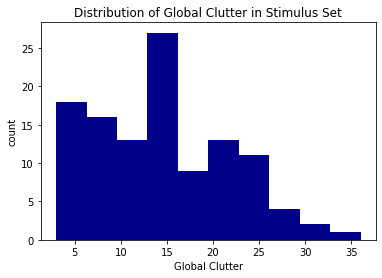

In [423]:
plt.hist(globalClutter, color='darkblue')
plt.ylabel('count')
plt.xlabel('Global Clutter')
plt.title('Distribution of Global Clutter in Stimulus Set')
plt.show();

m: [0.0150906]
b: -0.22733522330204983
R-squared:  0.028487339152954094


0.028

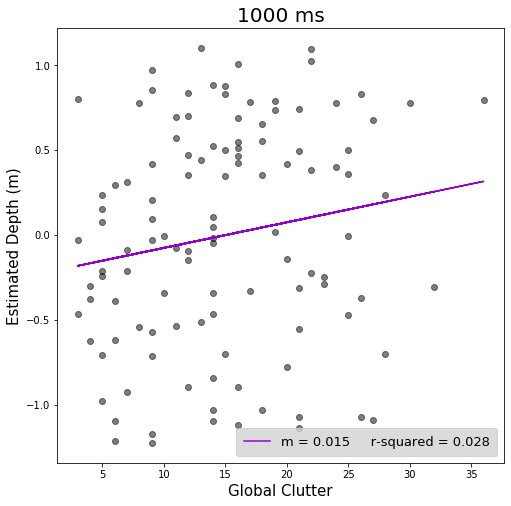

In [53]:

plt.figure(figsize = [8,8])
#run regression
X = np.array(globalClutter).reshape(-1,1)
y = trunc_y_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Global Clutter", fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [0.00515619]
b: 0.18867646174225788
R-squared:  0.04124527217835383


0.041

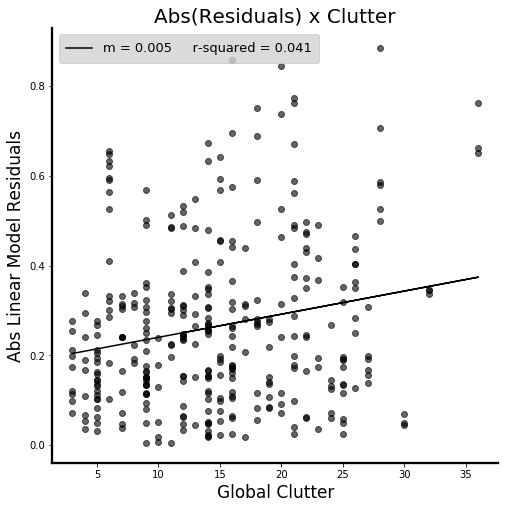

In [61]:


fig, ax = plt.subplots(figsize=[8,8])
ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)



for axis in ['bottom','left']:

    ax.spines[axis].set_linewidth(2.3)

#run regression
X = np.array(globalClutter*3).reshape(-1,1)
y = np.abs(np.array(trunc_all_residuals))
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.6, marker = 'o');
plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Abs(Residuals) x Clutter", fontsize = 20)
plt.xlabel("Global Clutter", fontsize = 17)
plt.ylabel("Abs Linear Model Residuals", fontsize = 17)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

In [73]:
len(dd_residuals_125), len(dd_globalClutter)

(112, 0)

In [84]:
# corr, p-value
print('Correlation between Average Discrimination Derived VE Linear Model Residuals and Global Clutter')
print(stats.pearsonr(np.mean([dd_residuals_125, dd_residuals_250, dd_residuals_1000], axis=0), dd_globalClutter))

print()

print('Correlation between Average Discrimination Derived VE Linear Model Residuals and Global Clutter')
print(stats.pearsonr(dd_residuals_125 + dd_residuals_250 + dd_residuals_1000, dd_globalClutter*3))


Correlation between Average Discrimination Derived VE Linear Model Residuals and Global Clutter
(0.15554427246143734, 0.10149631213715139)

Correlation between Average Discrimination Derived VE Linear Model Residuals and Global Clutter
(0.1029003676380138, 0.059541967412743986)


In [75]:
# corr, p-value
print('Correlation between Discrimination Derived VE Linear Model Residuals and Global Clutter')
print('125 ms: ',stats.pearsonr(dd_residuals_125, dd_globalClutter))
print('250 ms: ',stats.pearsonr(dd_residuals_250, dd_globalClutter))
print('1000 ms: ',stats.pearsonr(dd_residuals_1000, dd_globalClutter))

Correlation between Discrimination Derived VE Linear Model Residuals and Global Clutter
125 ms:  (0.17791914481762675, 0.0605456271739504)
250 ms:  (0.13212982396287168, 0.16491169516902054)
1000 ms:  (-0.06233981419658927, 0.5137712094938235)


In [76]:
# corr, p-value
print('Correlation between Abs Discrimination Derived VE Linear Model Residuals and Global Clutter')
print('125 ms: ',stats.pearsonr(np.abs(np.array(dd_residuals_125)), dd_globalClutter))
print('250 ms: ',stats.pearsonr(np.abs(np.array(dd_residuals_250)), dd_globalClutter))
print('1000 ms: ',stats.pearsonr(np.abs(np.array(dd_residuals_1000)), dd_globalClutter))

Correlation between Abs Discrimination Derived VE Linear Model Residuals and Global Clutter
125 ms:  (-0.12628731946151278, 0.18456662513819222)
250 ms:  (0.07380772496559392, 0.4392854410975877)
1000 ms:  (-0.13116893361377704, 0.16803276353003463)


In [77]:
# corr, p-value
print('Correlation between Discrimination Derived VE and Global Clutter')
print('125 ms: ',stats.pearsonr(dd_125, dd_globalClutter))
print('250 ms: ',stats.pearsonr(dd_250, dd_globalClutter))
print('1000 ms: ',stats.pearsonr(dd_1000, dd_globalClutter))

Correlation between Discrimination Derived VE and Global Clutter
125 ms:  (0.20526161936547083, 0.029924498122811904)
250 ms:  (0.16847448132761744, 0.07578572820309536)
1000 ms:  (0.02265105566736114, 0.8126122543753653)


In [25]:
len(ddTD_residuals_125), len(ddTD_globalClutter)

(114, 114)

In [28]:
# corr, p-value
print('Correlation between Average Discrimination Derived TD Linear Model Residuals and Global Clutter')
print(stats.pearsonr(np.mean([ddTD_residuals_125, ddTD_residuals_250, ddTD_residuals_1000], axis=0), ddTD_globalClutter))

print()

print('Correlation between All Discrimination Derived TD Linear Model Residuals and Global Clutter * 3')
print(stats.pearsonr(ddTD_residuals_125 + ddTD_residuals_250 + ddTD_residuals_1000, ddTD_globalClutter*3))


Correlation between Average Discrimination Derived TD Linear Model Residuals and Global Clutter
(-0.0011641710516843637, 0.9901918819706605)

Correlation between All Discrimination Derived TD Linear Model Residuals and Global Clutter * 3
(-0.001019650096649085, 0.985010542488815)


In [30]:
# corr, p-value
print('Correlation between Discrimination Derived TD Linear Model Residuals and Global Clutter')
print('125 ms: ',stats.pearsonr(ddTD_residuals_125, ddTD_globalClutter))
print('250 ms: ',stats.pearsonr(ddTD_residuals_250, ddTD_globalClutter))
print('1000 ms: ',stats.pearsonr(ddTD_residuals_1000, ddTD_globalClutter))

Correlation between Discrimination Derived TD Linear Model Residuals and Global Clutter
125 ms:  (-0.029063730616841747, 0.758873278925603)
250 ms:  (0.013788757796627988, 0.8842308036311769)
1000 ms:  (0.008488506796329238, 0.928577085991804)


In [31]:
# corr, p-value
print('Correlation between Abs Discrimination Derived TD Linear Model Residuals and Global Clutter')
print('125 ms: ',stats.pearsonr(np.abs(np.array(ddTD_residuals_125)), ddTD_globalClutter))
print('250 ms: ',stats.pearsonr(np.abs(np.array(ddTD_residuals_250)), ddTD_globalClutter))
print('1000 ms: ',stats.pearsonr(np.abs(np.array(ddTD_residuals_1000)), ddTD_globalClutter))

Correlation between Abs Discrimination Derived TD Linear Model Residuals and Global Clutter
125 ms:  (0.0038743447879744895, 0.9673668916352959)
250 ms:  (0.012485111870120025, 0.8951104153696127)
1000 ms:  (0.0074301022750823675, 0.9374632822137319)


In [32]:
# corr, p-value
print('Correlation between Discrimination Derived TD and Global Clutter')
print('125 ms: ',stats.pearsonr(ddTD_125, ddTD_globalClutter))
print('250 ms: ',stats.pearsonr(ddTD_250, ddTD_globalClutter))
print('1000 ms: ',stats.pearsonr(ddTD_1000, ddTD_globalClutter))

Correlation between Discrimination Derived TD and Global Clutter
125 ms:  (0.040680160031576096, 0.6673873568673543)
250 ms:  (0.03196065764847514, 0.7356857785654408)
1000 ms:  (0.028115789641297996, 0.7665086015776662)


## Local Clutter x Behavioral Data 

In [50]:
def getTargetLocation(stimfolder, rootdir):
    """
    imagepath = target folder 
    rootdir = main folder of all target folders (NOT SUNRGBD folder)
    """
#     stimfolder = imagepath.split('/')[-2]
    jsonpath = rootdir + '/' + stimfolder + '/data.json'
    
    # Opening JSON file
    f = open(jsonpath,)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)
    crossing_point = data['objects'][0]['crossing_point']
    # x, y is a misnomer for array indeces 
    # x value = 364 (verticel midline of image aka column index)
    x = crossing_point[0]['x']
    # y value - row index 
    y = crossing_point[0]['y']
    row_index = y
    col_index = x
    return (row_index,col_index)
    

In [51]:
final_stimuli = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

stimuli = []

for folder in os.listdir(final_stimuli):
    if 'resize' in folder:
        stimuli.append(folder)

In [52]:

target_coords = [getTargetLocation(path, final_stimuli) for path in stimuli]


In [53]:
stimuli[0], target_coords[0]

('000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize_1',
 (91.40339449541284, 364))

In [54]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]):
        yield x, y